##### Contents:
###### 1. Import Libraries
###### 2. Address security implications
###### 3. Create regional segmentation of data
###### 3.1 Create "Region" column
###### 3.2 Create a crosstab to compare spending habits in regions
###### 4. Create an exclusion flag for low-activity customers
###### 5. Create a profiling variables
###### 5.1 Age
###### 5.2 Income
###### 5.3 Number of Dependents 
###### 6. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
###### 6.1 Age Groups Visualizations
###### 6.2 Income Group Visualizations
###### 6.3 Nº of dependants Visualizations
###### 7. Aggregate Max, Mean, and Min Usage & Expenditure by Customer Profile
###### 8. Compare customer profiles with regions and departments
###### 9. Visualizations

##### 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path:
path = r'C:\Users\Daniella\ACH4 - Instacart Basket Analysis'

In [5]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', '4.9.1 - ords_prods_customers_merged.pkl'))

In [3]:
#### Create copy -  one million rows
df_ords_prods_cust = ords_prods_cust[:1000000].copy()  

NameError: name 'ords_prods_cust' is not defined

##### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [281]:
df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Nº of dependants,Family status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low_spender,20.5,Not regular customer,Female,Alabama,31,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,6.367797,Low_spender,20.5,Not regular customer,Female,Alabama,31,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,6.367797,Low_spender,20.5,Not regular customer,Female,Alabama,31,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,6.367797,Low_spender,20.5,Not regular customer,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,6.367797,Low_spender,20.5,Not regular customer,Female,Alabama,31,3,married,40423


##### Answer: In the previous exercise I had already dropped the "Name" and "Surname" columns so in the current dataframe there's no PII that needs to be removed.

##### 3. Regional segmentation of  data:

##### 3.1 Create "Region" column:

In [9]:
# Create "Region" column:
result = []

for value in df_ords_prods_cust['State']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append("Northeast")
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append("Midwest")
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append("South")
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append("West")
    else:
        result.append("Unknown")

In [11]:
# Assign values to the new "Region" column:
df_ords_prods_cust.loc[:,'Region']=result

##### 3.2 Crosstab to determine if there’s a difference in spending habits between the different U.S. regions.

In [15]:
# Create crosstab:
crosstab = pd.crosstab (df_ords_prods_cust['Region'], df_ords_prods_cust['spender_flag'],dropna = False)

In [293]:
crosstab.to_clipboard()

In [295]:
# Print crosstab:
print(crosstab)

spender_flag  High_spender  Low_spender
Region                                 
Midwest               4768       222507
Northeast             3783       176391
South                 7193       317740
West                  5642       261976


##### Answer: The South has the largest concentration of high and low spenders which may be due to their population size compared to other regions. On the other hand, we can see that Northeast has the smallest number of high spenders of the entire country.

In [17]:
# Flag for low-activity customers
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'

In [19]:
# Flag for high-activity customers
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [21]:
df_ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    955755
low-activity customer      44245
Name: count, dtype: int64

##### 4. Exclude low-activity customers from the data:

In [23]:
df_low_excluded = df_ords_prods_cust[df_ords_prods_cust['activity_flag'] != 'low-activity customer']

In [145]:
# Export new dataframe:
df_low_excluded.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'low_activity_customers_excluded_reduced.pkl'))

In [1]:
#### Subset -  one million rows
low_excluded = df_low_excluded[:1000000]

NameError: name 'df_low_excluded' is not defined

##### 5. Create a profiling variables

##### 5.1 Profiling variables: Age

In [29]:
df_low_excluded['age_group'] = None

C:\Users\Daniella\AppData\Local\Temp\ipykernel_17108\3659424824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_excluded['age_group'] = None


In [31]:
# Age groups:
df_low_excluded.loc[df_low_excluded['Age'] <= 25, 'age_group'] = 'Young Adult'
df_low_excluded.loc[(df_low_excluded['Age'] > 25) & (df_low_excluded['Age'] <= 40), 'age_group'] = 'Adult'
df_low_excluded.loc[(df_low_excluded['Age'] > 40) & (df_low_excluded['Age'] <= 65), 'age_group'] = 'Middle Aged'
df_low_excluded.loc[df_low_excluded['Age'] > 65, 'age_group'] = 'Senior'

In [33]:
# Check value counts for the age groups:
age_group_counts = df_low_excluded['age_group'].value_counts(dropna = False)

In [313]:
age_group_counts

age_group
Middle Aged    368331
Senior         237744
Adult          223185
Young Adult    126495
Name: count, dtype: int64

##### 5.2 Profiling variables: Income

In [35]:
df_low_excluded['income_group'] = None

C:\Users\Daniella\AppData\Local\Temp\ipykernel_17108\64325859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_excluded['income_group'] = None


In [37]:
# Income profile:
df_low_excluded.loc[df_low_excluded['income'] <= 50000, 'income_group'] = 'Low Income'
df_low_excluded.loc[(df_low_excluded['income'] > 50000) & (df_low_excluded['income'] <= 100000), 'income_group'] = 'Middle Income'
df_low_excluded.loc[df_low_excluded['income'] > 100000, 'income_group'] = 'High Income'

In [39]:
df_low_excluded['income_group'].value_counts()

income_group
High Income      436029
Middle Income    403762
Low Income       115964
Name: count, dtype: int64

##### 5.3 Profiling variables: Nº of dependants:

In [41]:
df_low_excluded['dependents_flag'] = None

C:\Users\Daniella\AppData\Local\Temp\ipykernel_17108\58735829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_excluded['dependents_flag'] = None


In [43]:
# Dependents flag:
df_low_excluded.loc[df_low_excluded['Nº of dependants'] > 0 ,'dependents_flag'] = 'Has Dependents'
df_low_excluded.loc[df_low_excluded['Nº of dependants'] == 0 ,'dependents_flag'] = 'No Dependents'

In [327]:
df_low_excluded['dependents_flag'].value_counts()

dependents_flag
Has Dependents    725733
No Dependents     230022
Name: count, dtype: int64

##### 6. Visualizations:

##### 6.1 Age Groups Visualizations

In [ ]:
# Make a bar chart showing age groups distribution:
bar = df_low_excluded['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

In [ ]:
# Export bar chart:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_reduced.png'))

##### 6.2 Income Group Visualizations

In [ ]:
# Make a bar chart showing age groups distribution:
bar2 = df_low_excluded['income_group'].value_counts().plot.bar()
plt.title('Distribution of Income Groups')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

In [ ]:
# Export bar chart:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution_reduced.png'))

##### 6.3 Nº of dependants Visualizations

In [ ]:
# Make a bar chart showing nº of dependants distribution:
bar3 = df_low_excluded['dependents_flag'].value_counts().plot.bar()
plt.title('Distribution of Nº of dependants')
plt.xlabel('Nº of dependants')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

In [ ]:
# Export bar chart:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_flag_distribution_reduced.png'))

##### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
# Create a subset of customer profile
customer_profile = df_low_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [ ]:
customer_profile

In [ ]:
# Aggregate variables for customer profiles for usage frequency
customer_frequency = df_low_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [ ]:
customer_frequency

##### 8. Compare customer profiles with regions and departments. & 9. Produce suitable charts to illustrate your results

In [45]:
# Import departments dataframe:
df_departments = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', '4.4 - departments_wrangled(new).csv'), index_col = False)

In [ ]:
print(df_departments.columns)

In [47]:
df_departments.rename(columns={df_departments.columns[0]: 'department_id'}, inplace=True)

In [49]:
df_low_excluded = df_low_excluded.merge(df_departments[['department_id', 'department']], 
                                         on='department_id', 
                                         how='left')

In [51]:
# Export new dataframe:
df_low_excluded.to_pickle(os.path.join(path,'02. Data','Prepared Data','ord_prod_cust_dept.pkl'))

##### 8.1 Top 10 departments by order frequency

In [164]:
# Top 10 departments by order frequency:
department_order_frequency = df_low_excluded.groupby('department')['order_id'].nunique()

In [ ]:
top_departments_by_order_frequency = department_order_frequency.sort_values(ascending=False).head(10)

Text(0, 0.5, 'Department')

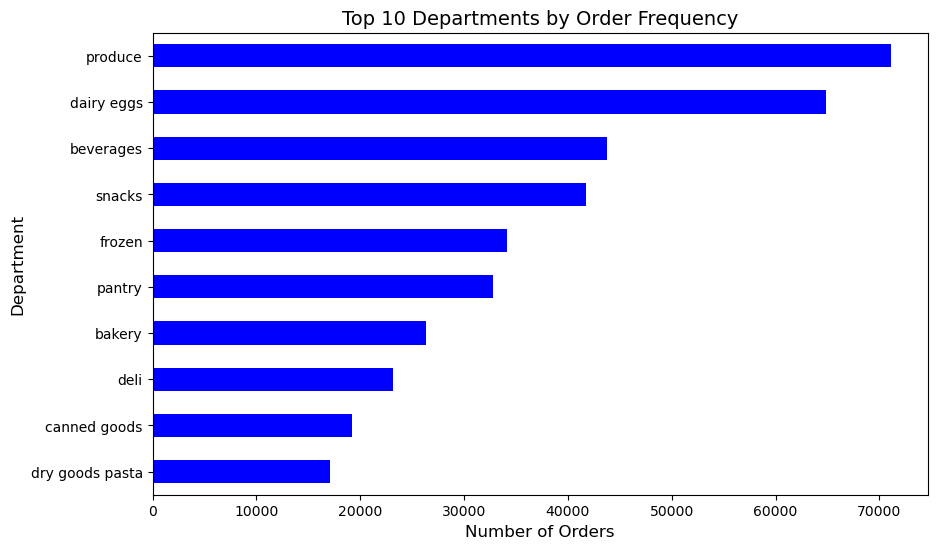

In [522]:
# Create bar chart:
plt.figure(figsize=(10, 6))
ax = top_departments_by_order_frequency.plot(kind='barh', color='blue')
ax.invert_yaxis()
ax.set_title('Top 10 Departments by Order Frequency', fontsize=14)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('Department', fontsize=12)

In [ ]:
# Export chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_by_order_chart.png')
ax.figure.savefig(save_path)

##### 8.2 Region and department comparison:

In [ ]:
# Region and department comparison:
region_dept= pd.crosstab(df_low_excluded['Region'], df_low_excluded['department'], dropna = False)

In [ ]:
# Department by Region bar chart:
region_dept_chart = region_dept.plot(kind='barh', figsize=(14, 10))
plt.title('Department Sales by Region')
plt.xlabel('Count of Products')
plt.ylabel('Region')

In [ ]:
# Export bar chart:
region_dept_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_chart.png'))

##### 8.3 Age group and department comparison:

In [512]:
# Age group and department comparison:
dept_age_comp = pd.crosstab(df_low_excluded['department'],df_low_excluded['age_group'],dropna = False)

Text(0, 0.5, 'Department')

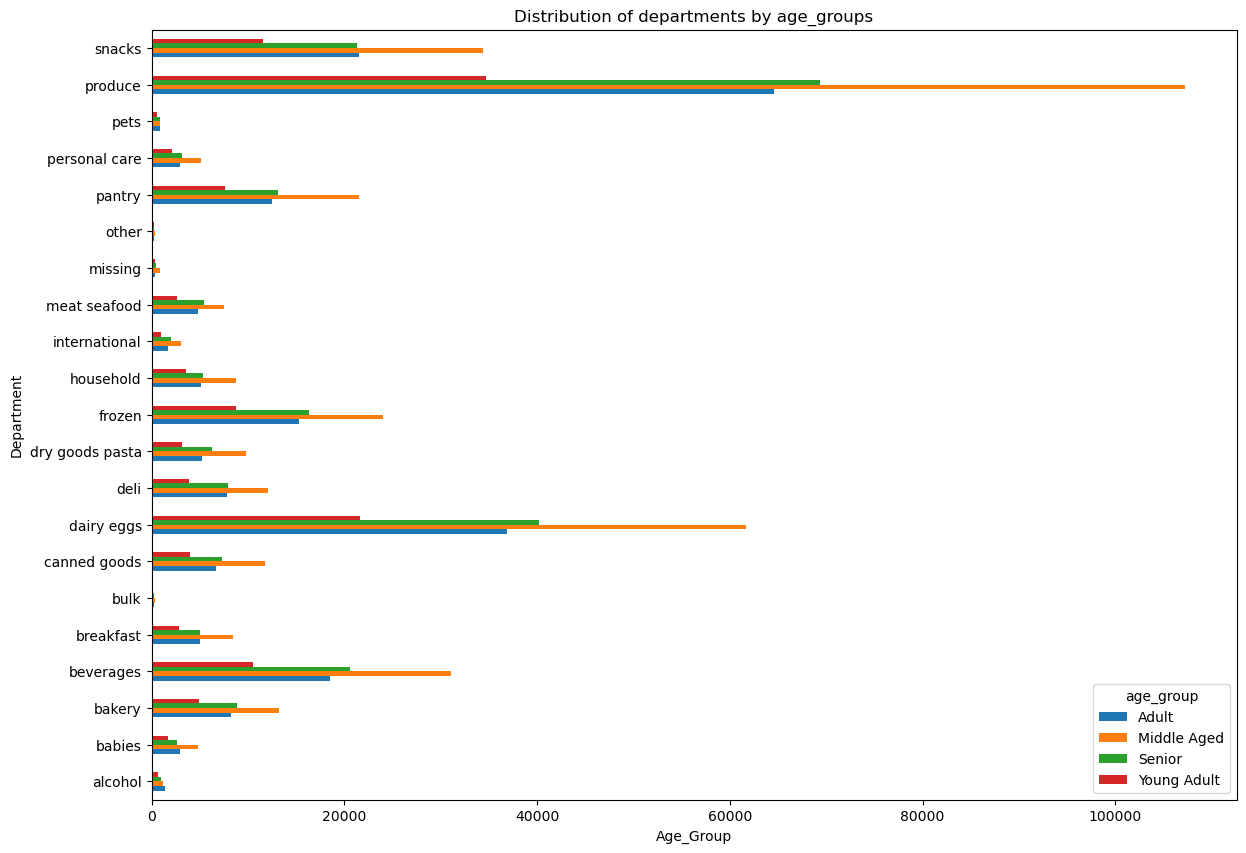

In [514]:
# Age group and department bar chart:
dept_age_chart = dept_age_comp.plot(kind='barh', figsize=(14, 10))
plt.title('Distribution of departments by age_groups')
plt.xlabel('Age_Group')
plt.ylabel('Department')

In [ ]:
# Export bar chart:
dept_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_chart.png'))

##### 8.4 Income groups & frequency:

In [ ]:
# Income groups & frequency:
income_freq = pd.crosstab(df_low_excluded['income_group'],df_low_excluded['frequency_flag'],dropna = False)

In [ ]:
# Income groups & frequency bar chart:
income_freq_chart = income_freq.plot(kind='barh', figsize=(14, 10))
plt.title('Income_group  by frequency_flag')
plt.xlabel('frequency_flag')
plt.ylabel('income_group')

In [ ]:
# Export bar chart:
income_freq_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_freq_chart.png'))

##### 8.5 Department & dependants_flag:

In [518]:
# Department & Dependants_flag:
dept_depend = pd.crosstab(df_low_excluded['department'],df_low_excluded['dependents_flag'],dropna = False)

Text(0, 0.5, 'Dependants_flag')

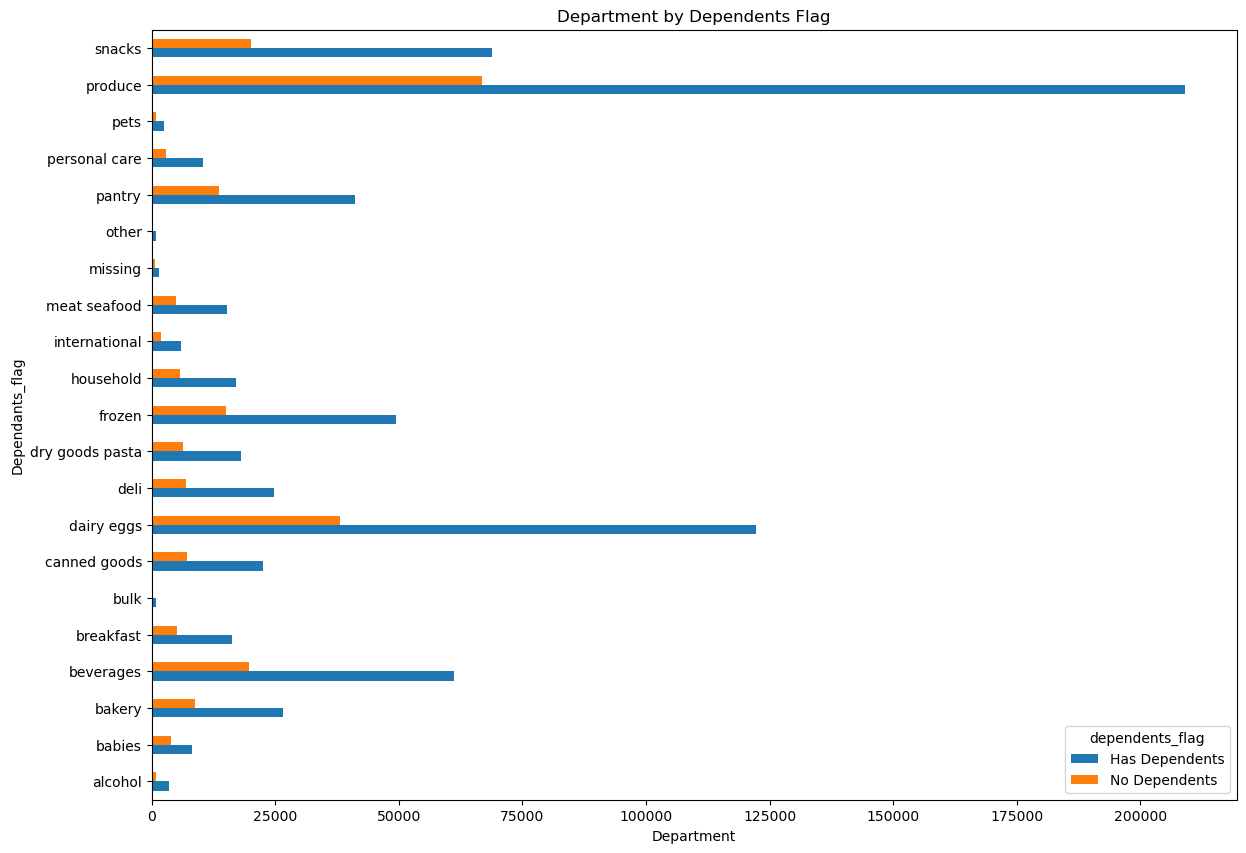

In [520]:
# Department & Dependants_flag bar chart:
dept_depend_chart = dept_depend.plot(kind='barh', figsize=(14, 10))
plt.title('Department by Dependents Flag')
plt.xlabel('Department')
plt.ylabel('Dependants_flag')

In [ ]:
# Export bar chart:
dept_depend_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_depend_chart.png'))

##### 8.6 Customer loyalty

In [343]:
# Customer loyalty:
frequency_counts = df_low_excluded['frequency_flag'].value_counts()

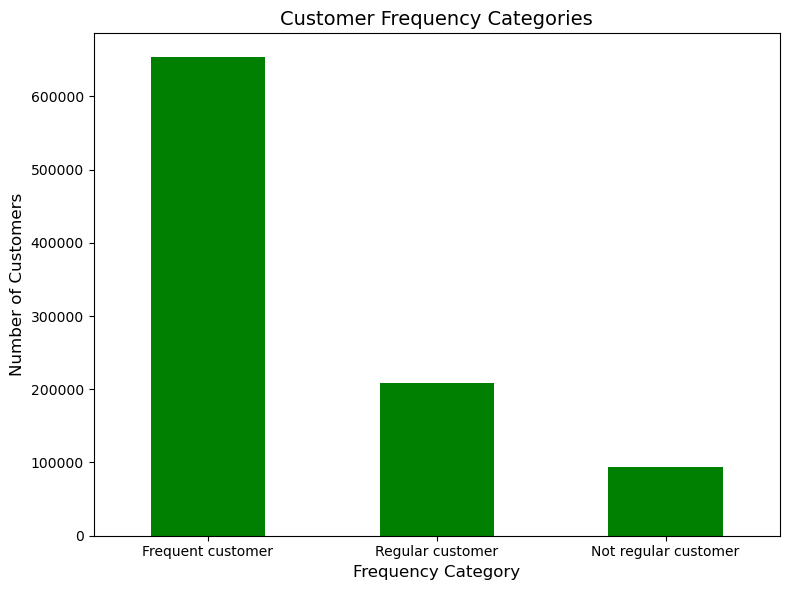

In [395]:
# Customer loyalty bar chart:
plt.figure(figsize=(8, 6))
ax = frequency_counts.plot(kind='bar', color='green')
ax.set_title('Customer Frequency Categories', fontsize=14)
ax.set_xlabel('Frequency Category', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

In [397]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'customer_frequency_chart.png')
ax.figure.savefig(save_path)

##### 8.7 Number of Orders by Loyalty Status

In [399]:
# Group by 'loyalty_flag' or 'frequency_flag' and calculate average values
loyalty_orders = df_low_excluded.groupby('loyalty_flag')['order_id'].nunique()  # number of unique orders per loyalty group
loyalty_avg_spend = df_low_excluded.groupby('loyalty_flag')['average_spend'].mean()  # average spend per loyalty group
loyalty_days_gap = df_low_excluded.groupby('loyalty_flag')['days_since_prior_order'].mean()  # average days between orders

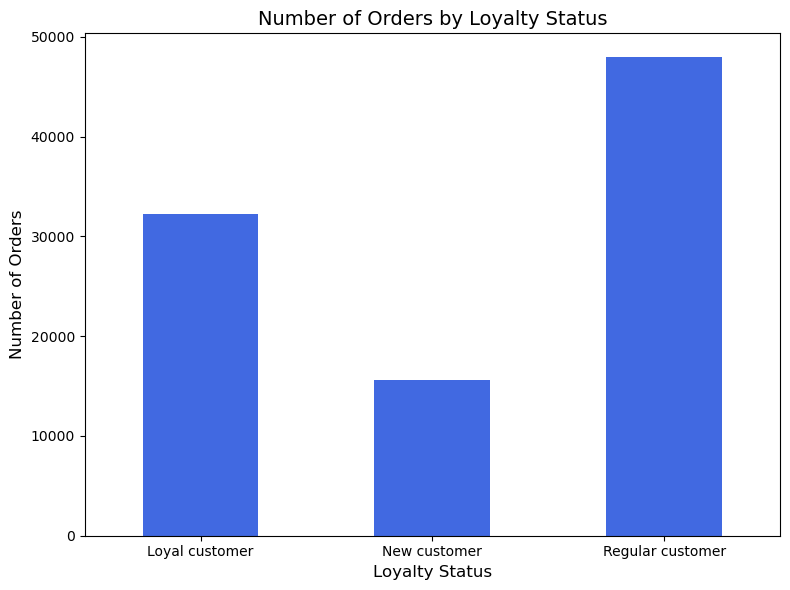

In [604]:
# Chart 1 - Loyalty status & Number of Orders:
plt.figure(figsize=(8, 6))
ax = loyalty_orders.plot(kind='bar', color='royalblue')
ax.set_title('Number of Orders by Loyalty Status', fontsize=14)
ax.set_xlabel('Loyalty Status', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()

In [606]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_orders_chart.png')
ax.figure.savefig(save_path)

##### 8.8 Loyalty Flag vs Spender Flag

In [467]:
# Loyalty Flag vs Spender Flag:
loyalty_spender_crosstab = pd.crosstab(df_low_excluded['loyalty_flag'], df_low_excluded['spender_flag'])

<Figure size 800x600 with 0 Axes>

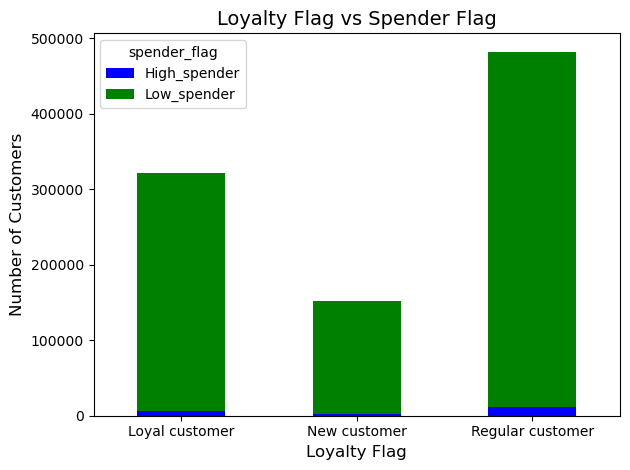

In [465]:
# Loyalty Flag vs Spender Flag Chart:
plt.figure(figsize=(8, 6))
ax = loyalty_spender_crosstab.plot(kind='bar', stacked=True, color=['blue', 'green'])
ax.set_title('Loyalty Flag vs Spender Flag', fontsize=14)
ax.set_xlabel('Loyalty Flag', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()

In [469]:
# Export chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spender_chart.png')
ax.figure.savefig(save_path)

##### 8.9 Orders per Region

In [182]:
region_orders = df_low_excluded.groupby('Region')['order_id'].nunique()
region_orders_sorted = region_orders.sort_values(ascending=False)

Text(0, 0.5, 'Region')

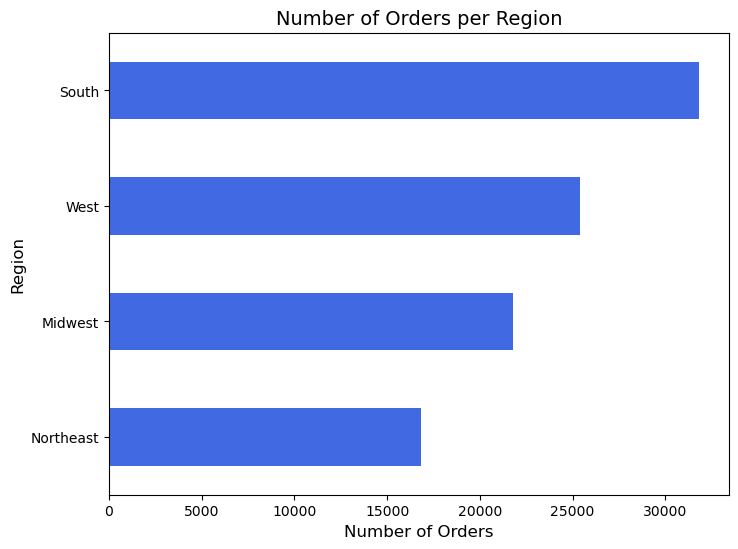

In [184]:
# Orders per Region
plt.figure(figsize=(8, 6))
ax = region_orders_sorted.plot(kind='barh', color='royalblue')
ax.invert_yaxis()
ax.set_title('Number of Orders per Region', fontsize=14)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('Region', fontsize=12)

In [562]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'orders_per_region.png')
ax.figure.savefig(save_path)

##### 8.10 Avg Spend per Region

In [189]:
# Avg Spend per Region:
region_avg_spend = df_low_excluded.groupby('Region')['average_spend'].mean()  
region_avg_spend_sorted = region_avg_spend.sort_values(ascending=False)

Text(0, 0.5, 'Region')

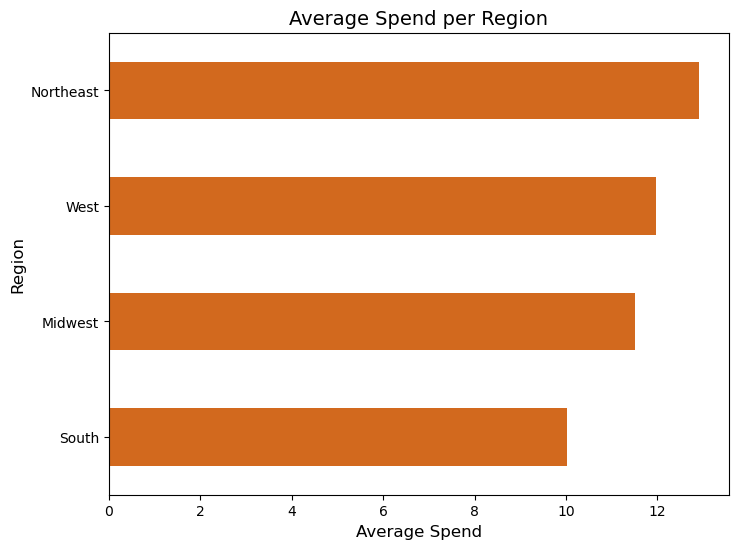

In [191]:
# Avg Spend per Region
plt.figure(figsize=(8, 6))
ax = region_avg_spend_sorted.plot(kind='barh', color='chocolate')
ax.invert_yaxis()
ax.set_title('Average Spend per Region', fontsize=14)
ax.set_xlabel('Average Spend', fontsize=12)
ax.set_ylabel('Region', fontsize=12)

In [594]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'avg_spend_per_region.png')
ax.figure.savefig(save_path)

##### 8.11 Orders by Age and Family Status

In [667]:
# Group by 'Family status' to get the number of orders
family_orders = df_low_excluded.groupby(['Family status'])['order_id'].nunique()

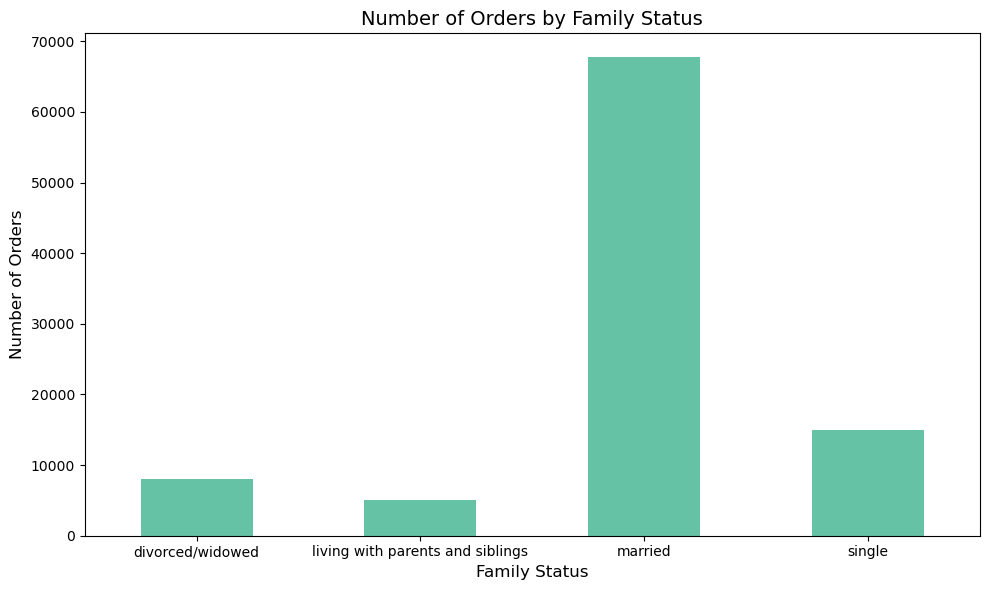

In [671]:
# Chart for Orders by Age and Family Status
fig, ax = plt.subplots(figsize=(10, 6))
family_orders.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
ax.set_title('Number of Orders by Family Status', fontsize=14)
ax.set_xlabel('Family Status', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()

In [665]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family_orders.png')
ax.figure.savefig(save_path)

##### 8.12 Orders by Age

In [669]:
# Group by 'Age'to get the number of orders
age_orders = df_low_excluded.groupby(['age_group'])['order_id'].nunique()

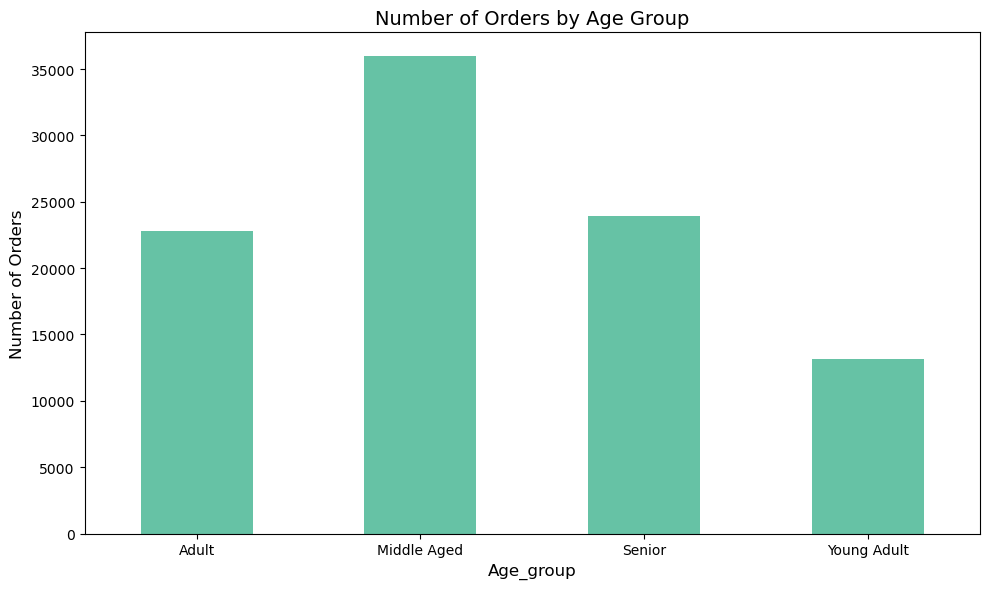

In [675]:
# Chart for Orders by Age:
fig, ax = plt.subplots(figsize=(10, 6))
age_orders.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
ax.set_title('Number of Orders by Age Group', fontsize=14)
ax.set_xlabel('Age_group', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()

In [757]:
# Export bar chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_orders.png')
ax.figure.savefig(save_path)

TypeError: 'str' object is not callable

##### 8.13 Age groups %

In [73]:
# Age groups:
age_group_counts = df_low_excluded['age_group'].value_counts()

Text(0.5, 1.0, 'Customer Distribution by Age Group')

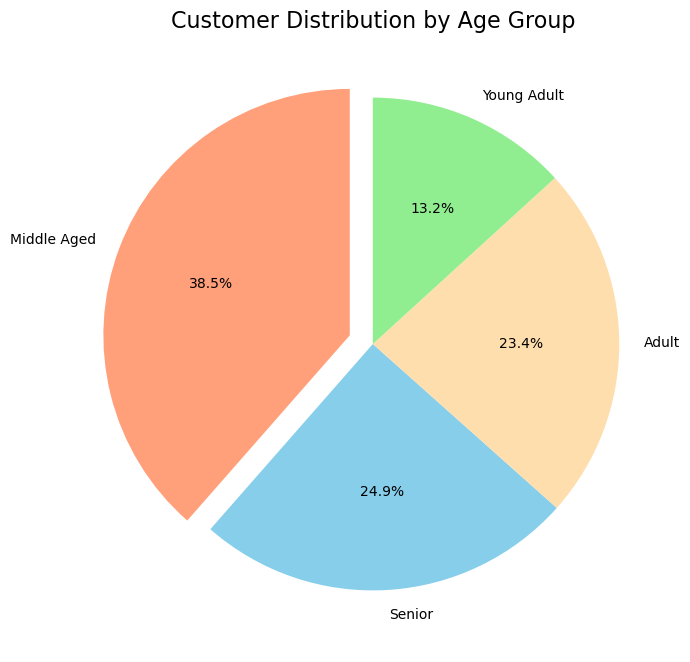

In [83]:
# Pie chart - age groups:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    age_group_counts,  # Data to plot
    labels=age_group_counts.index,  # Labels for the slices (age groups)
    autopct='%1.1f%%',  # Show percentages for each slice
    startangle=90,  # Start angle to rotate the chart
    colors=['#FFA07A', '#87CEEB', '#FFDEAD', '#90EE90', '#FF6347', '#DDA0DD', '#FFD700'],  # Custom colors
    explode=[0.1 if x == age_group_counts.max() else 0 for x in age_group_counts]  # Highlight the largest slice
)
ax.set_title('Customer Distribution by Age Group', fontsize=16)

In [79]:
# Export pie chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups.png')
ax.figure.savefig(save_path)

##### 8.14 Income groups

In [81]:
# Income group:
income_group_counts = df_low_excluded['income_group'].value_counts()

Text(0.5, 1.0, 'Customer Distribution by Income Group')

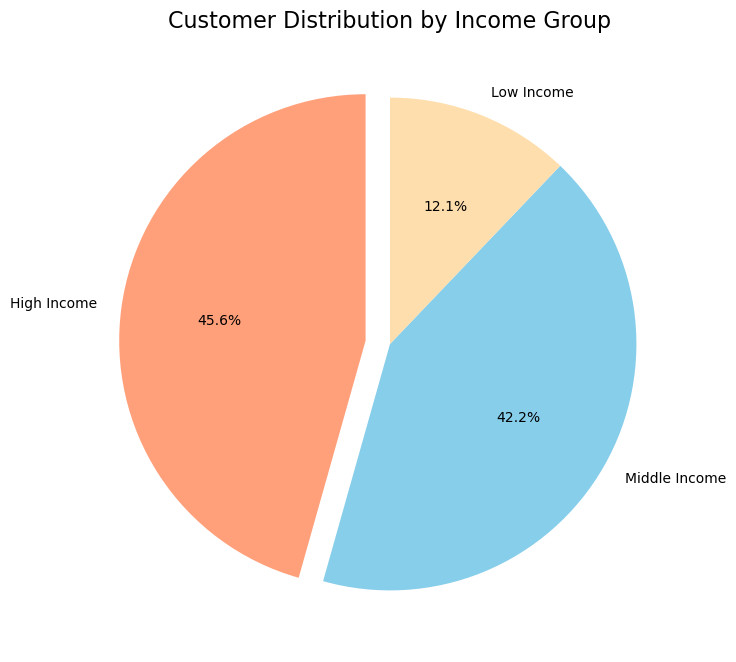

In [85]:
# Pie chart - income groups:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    income_group_counts,  # Data to plot (counts of customers in each income group)
    labels=income_group_counts.index,  # Labels for the slices (income groups)
    autopct='%1.1f%%',  # Show percentages for each slice
    startangle=90,  # Start angle to rotate the chart
    colors=['#FFA07A', '#87CEEB', '#FFDEAD', '#90EE90', '#FF6347', '#DDA0DD'],  # Custom colors (optional)
    explode=[0.1 if x == income_group_counts.max() else 0 for x in income_group_counts]  # Highlight the largest slice
)
ax.set_title('Customer Distribution by Income Group', fontsize=16)

In [87]:
# Export pie chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_groups.png')
ax.figure.savefig(save_path)

##### 8.15 Family status

In [93]:
# Family status:
family_status_counts = df_low_excluded['Family status'].value_counts()

Text(0.5, 1.0, 'Customer Distribution by Family Status')

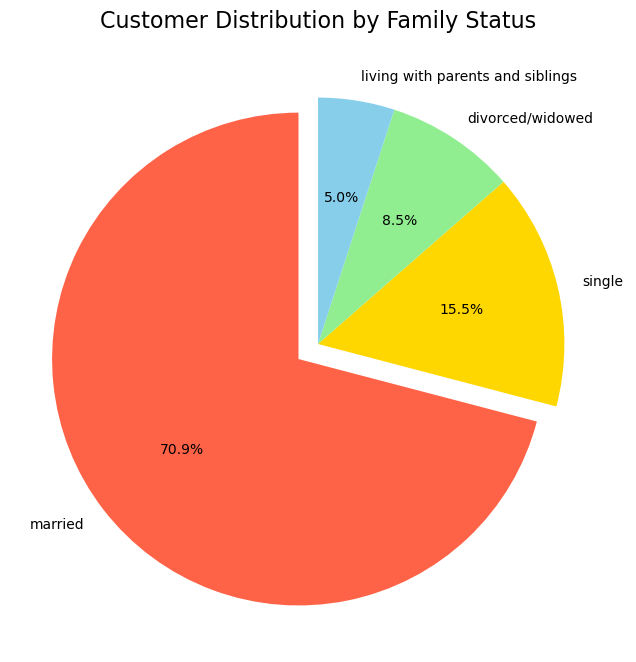

In [95]:
# Pie chart for family status:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    family_status_counts,  # Data to plot (counts of customers in each family status group)
    labels=family_status_counts.index,  # Labels for the slices (family status categories)
    autopct='%1.1f%%',  # Show percentages for each slice
    startangle=90,  # Start angle to rotate the chart
    colors=['#FF6347', '#FFD700', '#90EE90', '#87CEEB'],  # Custom colors (optional)
    explode=[0.1 if x == family_status_counts.max() else 0 for x in family_status_counts]  # Highlight the largest slice
)
ax.set_title('Customer Distribution by Family Status', fontsize=16)

In [97]:
# Export pie chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family_status.png')
ax.figure.savefig(save_path)

##### 8.16 Top 10 Department

In [121]:
# Top 10 Department:
department_counts = df_low_excluded['department'].value_counts()
top_n = 10
top_departments = department_counts.head(top_n)

Text(0.5, 1.0, 'Top 10 Product Distribution by Department')

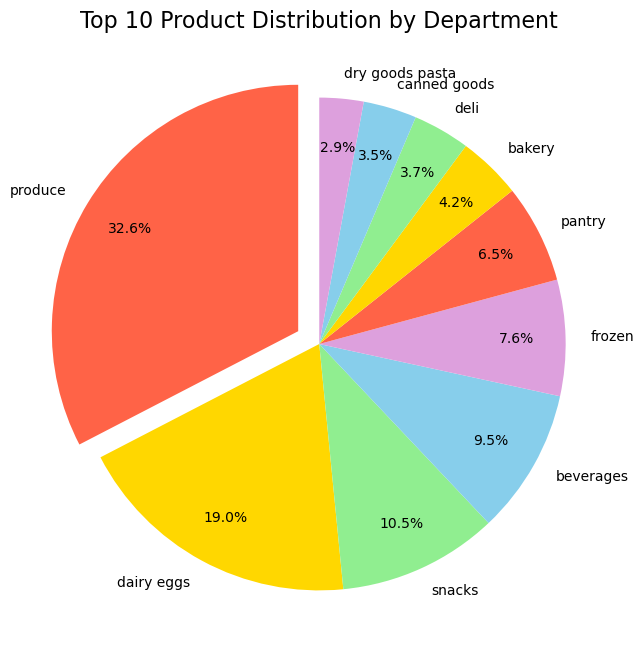

In [125]:
# Pie chart for department:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    top_departments, 
    labels=top_departments.index, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#FF6347', '#FFD700', '#90EE90', '#87CEEB', '#DDA0DD'], 
    explode=[0.1 if x == top_departments.max() else 0 for x in top_departments],
    pctdistance=0.8
)
ax.set_title('Top 10 Product Distribution by Department', fontsize=16)

In [127]:
# Export pie chart:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top10_departments.png')
ax.figure.savefig(save_path)